In [1]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()
import PortfolioAnalyser as pa

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
# read excel
USA_sc = pd.read_excel('USA_SC.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
USA_sc.Date = pd.to_datetime(USA_sc.Date)

# Set date column as index
USA_sc.set_index('Date', inplace=True)

# Set column name
USA_sc.columns = ['USA_SC']

In [3]:
# read excel
USA_lc = pd.read_excel('USA_LC.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
USA_lc.Date = pd.to_datetime(USA_lc.Date)

# Set date column as index
USA_lc.set_index('Date', inplace=True)

# Set column name
USA_lc.columns = ['USA_LC']

In [4]:
# read excel
europe_sc = pd.read_excel('Europe_SC.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
europe_sc.Date = pd.to_datetime(europe_sc.Date)

# Set date column as index
europe_sc.set_index('Date', inplace=True)

# Set column name
europe_sc.columns = ['Europe_SC']

In [5]:
# read excel
europe_lc = pd.read_excel('Europe_LC.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
europe_lc.Date = pd.to_datetime(europe_lc.Date)

# Set date column as index
europe_lc.set_index('Date', inplace=True)

# Set column name
europe_lc.columns = ['Europe_LC']

In [6]:
fundos = pa.merge_time_series(USA_sc, USA_lc)
fundos = pa.merge_time_series(fundos, europe_lc)
fundos = pa.merge_time_series(fundos, europe_sc)

In [7]:
fundos = pa.normalize(fundos)

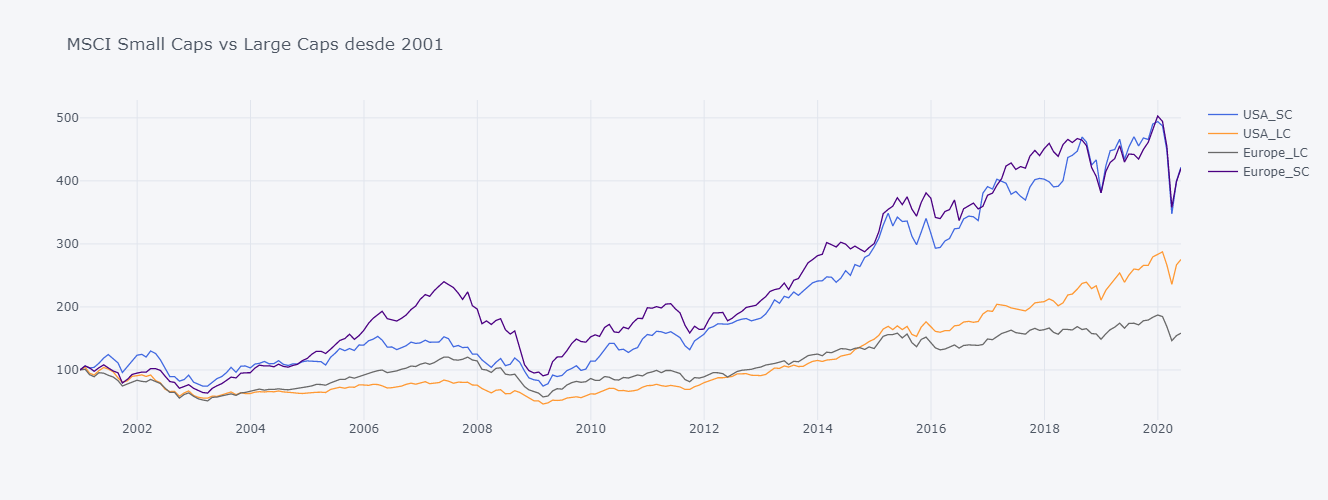

In [8]:
fundos.iplot(dimensions=pa.dimensions, title='MSCI Small Caps vs Large Caps desde 2001', color=['royalblue', 'orange', 'dimgrey', 'indigo'])

**Nota:** Todos os dados são GROSS EUR para serem semelhantes. A "perda" do USA aqui deve-se muito à valorização do euro até 2008. Se quiseres comparação de rentabilidades em moeda local é simples de fazer tb. Moeda local já vai no S&P 500 vs Stoxx 600.

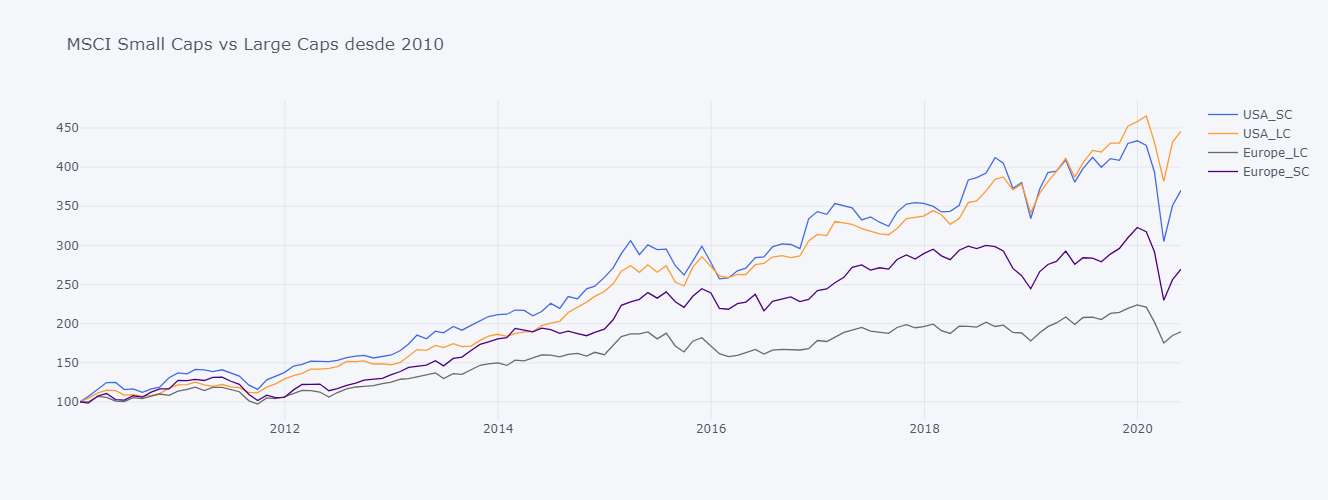

In [9]:
fundos_2010 = fundos.loc['2010':]
fundos_2010 = pa.normalize(fundos_2010)

fundos_2010.iplot(dimensions=pa.dimensions, title='MSCI Small Caps vs Large Caps desde 2010', color=['royalblue', 'orange', 'dimgrey', 'indigo'])

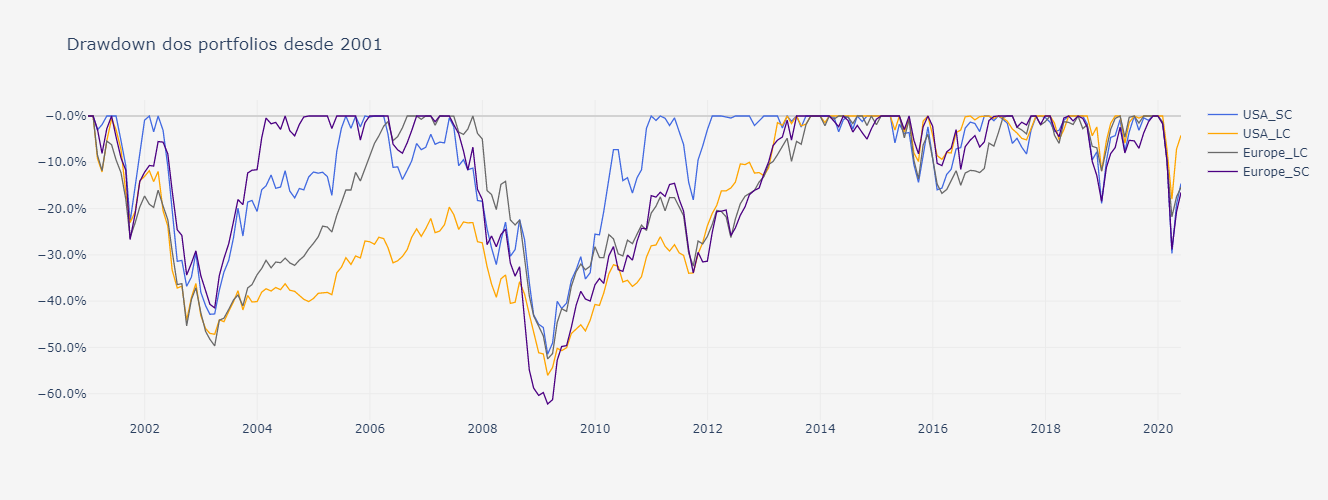

In [10]:
DD = pa.compute_drawdowns(fundos)
DD = DD /100

layout = go.Layout(
    title='Drawdown dos portfolios desde 2001',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 0],
    name = DD.columns.to_list()[0],
    line = dict(
        color = 'royalblue',
        width = 1.3)
)

trace1 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 1],
    name = DD.columns.to_list()[1],
    line = dict(
        color = 'orange',
        width = 1.3)
)

trace2 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 2],
    name = DD.columns.to_list()[2],
    line = dict(
        color = 'dimgrey',
        width = 1.3)
)

trace3 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 3],
    name = DD.columns.to_list()[3],
    line = dict(
        color = 'indigo',
        width = 1.3)
)

data = [trace0, trace1, trace2, trace3]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Dica:** A interactividade dos gráficos da plotly permite:

    . Zoom (mantenham o clique e arrastem o cursor em simultâneo, em cima do gráfico);
    . Tem uma lista de opções que aparece se forem com o cursor ao canto superior direito;
    . Façam duplo clique no gráfico ou seleccionem a opção Autoscale/Reset Axes para voltar ao normal;
    . Alterem a opção de 'Compare data on hoover' para 'Show closest data on hoover' se vos for mais conveniente;
    . Se clicarem num nome na legenda esse fundo desaparece (clicando de novo ele volta a apetecer).

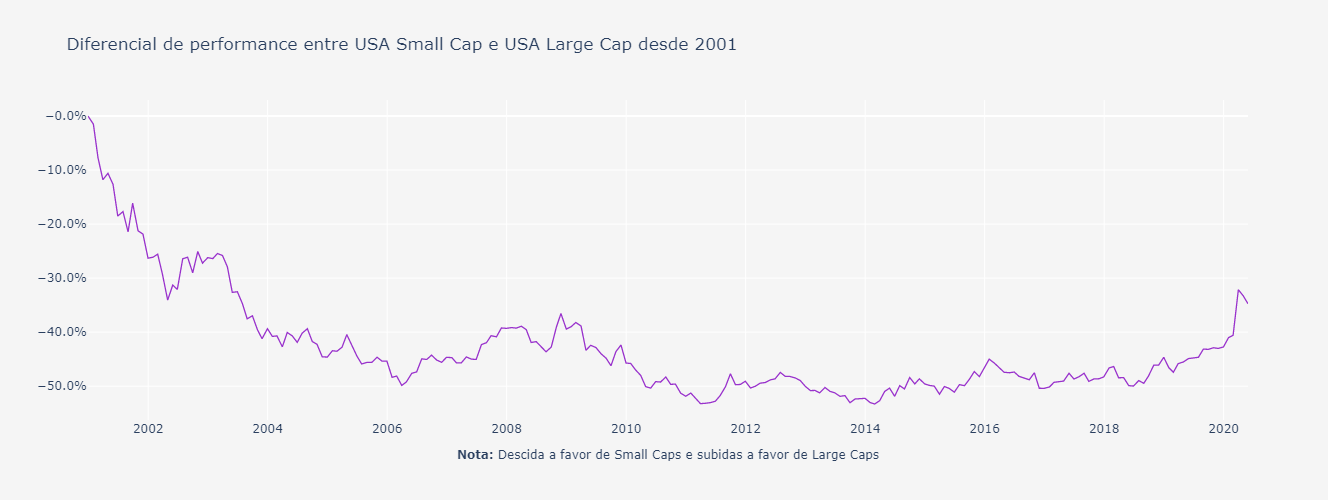

In [11]:
layout = go.Layout(
    title='Diferencial de performance entre USA Small Cap e USA Large Cap desde 2001',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='<b>Nota:</b> Descida a favor de Small Caps e subidas a favor de Large Caps',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = fundos.index,
    y = (round(((fundos.iloc[:, 1] / fundos.iloc[:, 0])- 1), 5)),
    name = 'Portfolio',
    line = dict(
        color = 'darkorchid',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

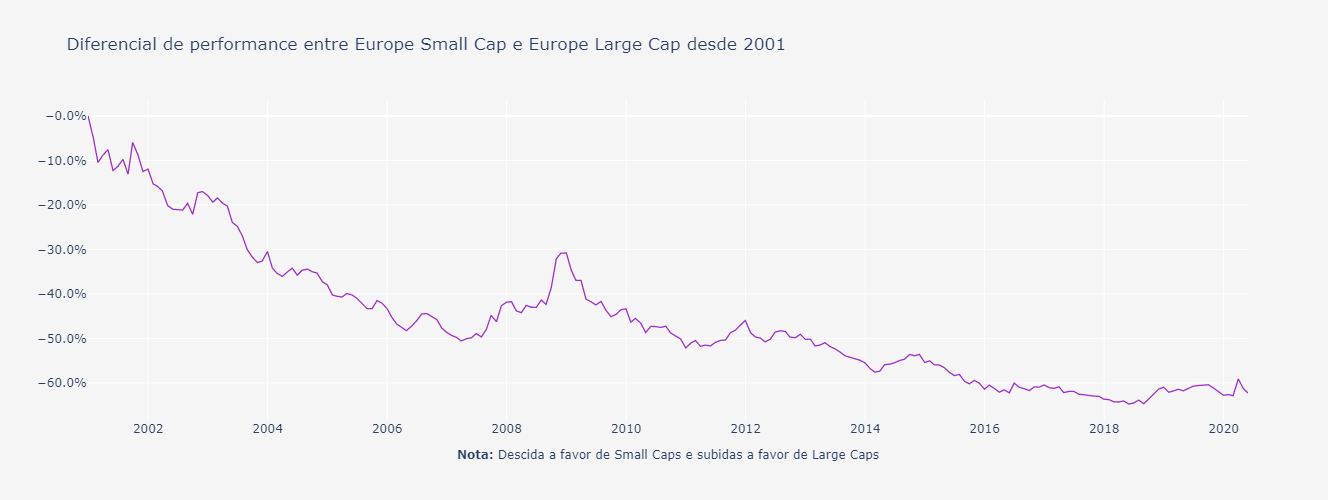

In [12]:
layout = go.Layout(
    title='Diferencial de performance entre Europe Small Cap e Europe Large Cap desde 2001',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='<b>Nota:</b> Descida a favor de Small Caps e subidas a favor de Large Caps',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = fundos.index,
    y = (round(((fundos.iloc[:, 2] / fundos.iloc[:, 3])- 1), 5)),
    name = 'Portfolio',
    line = dict(
        color = 'darkorchid',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Este gráfico apresenta a diferença relativa (ao invés da absoluta) entre o MSCI Large Caps e o MSCI World Small Caps.

In [13]:
pa.print_title('Performance dos fundos desde 2001')
pa.compute_performance_table(fundos, freq='months')

**Performance dos fundos desde 2001**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,7.70%,321.87%,19.29%,0.40,-51.47%,0.15
USA_LC,5.35%,175.28%,14.73%,0.36,-56.03%,0.10
Europe_LC,2.40%,58.37%,15.12%,0.16,-52.48%,0.05
Europe_SC,7.67%,319.87%,18.53%,0.41,-62.22%,0.12


In [14]:
pa.print_title('Performance a 12 meses')
fundos_1 = pa.filter_by_date(fundos, years=1)
pa.compute_performance_table(fundos_1, freq='months')

**Performance a 12 meses**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,-2.75%,-2.74%,31.52%,-0.09,-29.68%,-0.09
USA_LC,15.17%,15.15%,21.46%,0.71,-17.96%,0.84
Europe_LC,-4.73%,-4.73%,19.12%,-0.25,-21.78%,-0.22
Europe_SC,-2.31%,-2.30%,28.56%,-0.08,-28.83%,-0.08


In [15]:
pa.print_title('Performance a 3 anos')
fundos_3 = pa.filter_by_date(fundos, years=3)
pa.compute_performance_table(fundos_3, freq='months')

**Performance a 3 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,3.66%,11.38%,22.75%,0.16,-29.68%,0.12
USA_LC,11.53%,38.71%,16.31%,0.71,-17.96%,0.64
Europe_LC,-0.98%,-2.92%,14.06%,-0.07,-21.78%,-0.05
Europe_SC,-0.67%,-2.00%,19.35%,-0.03,-28.83%,-0.02


In [16]:
pa.print_title('Performance a 5 anos')
fundos_5 = pa.filter_by_date(fundos, years=5)
pa.compute_performance_table(fundos_5, freq='months')

**Performance a 5 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,4.25%,23.15%,20.42%,0.21,-29.68%,0.14
USA_LC,10.12%,62.02%,15.17%,0.67,-17.96%,0.56
Europe_LC,0.01%,0.03%,14.00%,0.00,-21.78%,0.00
Europe_SC,2.38%,12.48%,17.42%,0.14,-28.83%,0.08


In [17]:
pa.print_title('Performance a 10 anos')
fundos_10 = pa.filter_by_date(fundos, years=10)
pa.compute_performance_table(fundos_10, freq='months')

**Performance a 10 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,11.50%,196.84%,17.29%,0.66,-29.68%,0.39
USA_LC,14.59%,290.14%,12.68%,1.15,-17.96%,0.81
Europe_LC,6.49%,87.47%,12.80%,0.51,-21.78%,0.30
Europe_SC,10.11%,161.89%,15.61%,0.65,-28.83%,0.35


In [18]:
pa.print_title('Performance a 15 anos')
fundos_15 = pa.filter_by_date(fundos, years=15)
pa.compute_performance_table(fundos_15, freq='months')

**Performance a 15 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
USA_SC,8.74%,251.13%,18.47%,0.47,-51.47%,0.17
USA_LC,9.65%,298.42%,13.48%,0.72,-45.25%,0.21
Europe_LC,4.71%,99.39%,14.28%,0.33,-52.48%,0.09
Europe_SC,7.97%,215.97%,18.23%,0.44,-62.22%,0.13


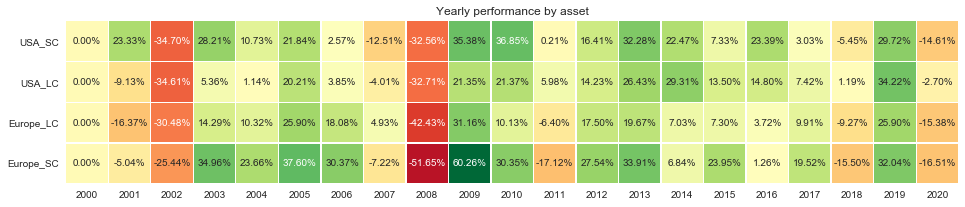

In [19]:
fundos_norm = fundos.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(16,3)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance by asset')
plt.show()

In [20]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF